In [1]:
import pandas as pd

In [2]:
chosen_ramris:str = 'R:\\AIMIRA\\AIMIRA_Scores\\SPSS data\\TE_scores_MRI_serieel_nieuw.csv'
df = pd.read_csv(chosen_ramris, sep=',')

In [3]:
df.head(5)

,Unnamed: 0,TENR,hoeveelste_MRI,SCANdatum,MTDERO1.1,MTDERO1.2,MTDERO2.1,MTDERO2.2,MTDERO3.1,MTDERO3.2,...,WRTSYI.1,WRTSYI.2,WRTSY1.1,WRTSY1.2,WRTSY2.1,WRTSY2.2,WRTSY3.1,WRTSY3.2,WRTSY4.1,WRTSY4.2
0,1,1,1,2015-03-19,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0
1,2,1,2,2015-08-17,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0
2,3,1,3,2016-04-12,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,1,4,2017-04-25,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,2,1,2015-03-31,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
WRs = [column for column in df if column[:2]=='MC']
WRs.append('TENR')
dfwr = df[WRs]  # df of wrist + csaid

In [9]:
dfwr.head(5)

,MCDERO2.1,MCDERO2.2,MCDERO3.1,MCDERO3.2,MCDERO4.1,MCDERO4.2,MCDERO5.1,MCDERO5.2,MCPERO2.1,MCPERO2.2,...,MCFTSY5.2,MCETSY2.1,MCETSY2.2,MCETSY3.1,MCETSY3.2,MCETSY4.1,MCETSY4.2,MCETSY5.1,MCETSY5.2,TENR
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2


In [19]:
# 需要计算所有Wrist的TSY, SYN, BME. 合并.1和.2
TSY = [column for column in dfwr if (column[3:6]=='TSY' or column=='TENR')]
SYN = [column for column in dfwr if (column[2:5]=='SYN' or column=='TENR')]
BME = [column for column in dfwr if (column[3:6]=='BME' or column=='TENR')]
dfwr_tsy = df[TSY]
dfwr_syn = df[SYN]
dfwr_bme = df[BME]

In [20]:
dfwr_syn.head(5)

,MCSYN2.1,MCSYN2.2,MCSYN3.1,MCSYN3.2,MCSYN4.1,MCSYN4.2,MCSYN5.1,MCSYN5.2,TENR
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
1,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1
2,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2


In [21]:
# def splitreader(df:pd.DataFrame):
#     read1 = [column for column in df if (column[-2:]=='.1' or column=='CSANUMM')]
#     read2 = [column for column in df if (column[-2:]=='.2' or column=='CSANUMM')]
#     return df[read1], df[read2]

def meanreader(df:pd.DataFrame):
    meancolumn = [column[:-2] for column in df if column[-2:]=='.1']
    for col in meancolumn:
        col1, col2 = col+'.1', col+'.2'
        df.loc[:, col1] = pd.to_numeric(df[col1], errors='coerce')
        df.loc[df[col1]>10, col1] = 0
        df.loc[:, col2] = pd.to_numeric(df[col2], errors='coerce')
        df.loc[df[col2]>10, col2] = 0
        df.loc[:, col] = df[[col1, col2]].mean(axis=1, skipna=True)
    leftcolumn = ['TENR']
    leftcolumn.extend(meancolumn)
    return df[leftcolumn]

In [22]:
# tsy1, tsy2 = splitreader(dfwr_tsy)
# syn1, syn2 = splitreader(dfwr_syn)
# bme1, bme2 = splitreader(dfwr_bme)
meantsy = meanreader(dfwr_tsy.copy())
meansyn = meanreader(dfwr_syn.copy())
meanbme = meanreader(dfwr_bme.copy())
# print(meantsy.head())
# print(meansyn.head())
# print(meanbme.head())

In [23]:
def sumreader(df:pd.DataFrame) ->pd.DataFrame:
    scorecolumn = [column for column in df if column!='TENR']
    df['sums'] = df[scorecolumn].sum(axis=1, skipna=True)
    return df[['TENR', 'sums']]

In [24]:
sumtsy:pd.DataFrame = sumreader(meantsy)  # CSANUMM, sumtsy
sumsyn:pd.DataFrame = sumreader(meansyn)
sumbme:pd.DataFrame = sumreader(meanbme)

In [25]:
tsycount = sumtsy['sums'].value_counts()
syncount = sumsyn['sums'].value_counts()
bmecount = sumbme['sums'].value_counts()

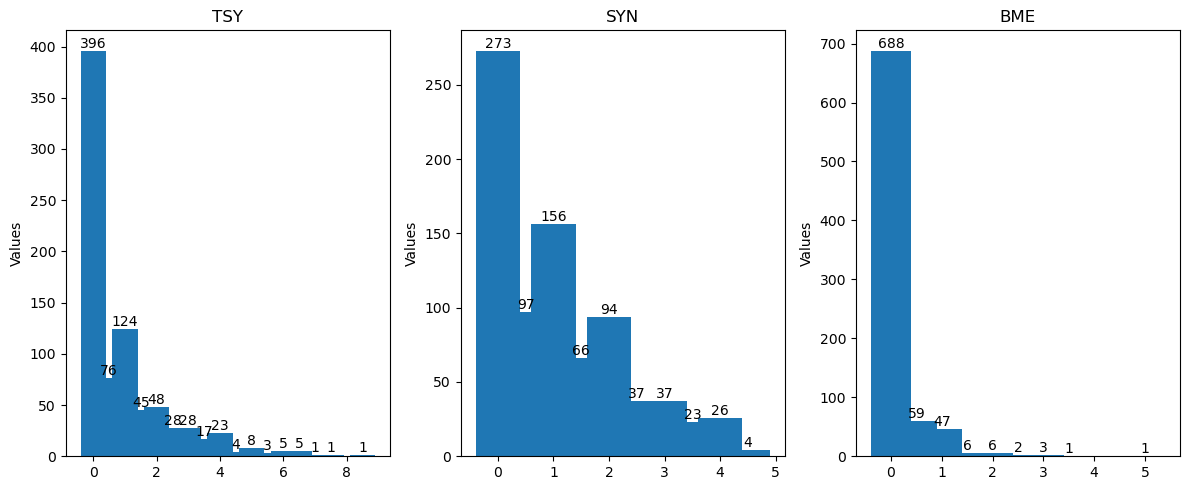

In [26]:
from matplotlib import pyplot as plt

fig, axs = plt.subplots(1, 3, figsize=(12, 5))
bars1 = axs[0].bar(tsycount.index, tsycount.values)
axs[0].set_title('TSY')
axs[0].set_ylabel('Values')
# 在第一个子图上显示每个柱的值
for bar in bars1:
    yval = bar.get_height()
    axs[0].text(bar.get_x() + bar.get_width() / 2, yval, int(yval), ha='center', va='bottom')

bars2 = axs[1].bar(syncount.index, syncount.values)
axs[1].set_title('SYN')
axs[1].set_ylabel('Values')
# 在第二个子图上显示每个柱的值
for bar in bars2:
    yval = bar.get_height()
    axs[1].text(bar.get_x() + bar.get_width() / 2, yval, int(yval), ha='center', va='bottom')

bars3 = axs[2].bar(bmecount.index, bmecount.values)
axs[2].set_title('BME')
axs[2].set_ylabel('Values')
# 在第三个子图上显示每个柱的值
for bar in bars3:
    yval = bar.get_height()
    axs[2].text(bar.get_x() + bar.get_width() / 2, yval, int(yval), ha='center', va='bottom')


plt.tight_layout()
plt.show()